In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-school-2022-task-2/train_data.csv
/kaggle/input/summer-school-2022-task-2/test_data.csv
/kaggle/input/summer-school-2022-task-2/sample_submssions.csv


In [2]:
#loading the dataset
train = pd.read_csv('/kaggle/input/summer-school-2022-task-2/train_data.csv')
test = pd.read_csv('/kaggle/input/summer-school-2022-task-2/test_data.csv')
print(train.shape)
train.head()

(208764, 16)


,id,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,8990,control,bus,2007,automatik,136,b_klasse,125000,1,benzin,mercedes_benz,nein,55232
1,1,privat,Angebot,49900,test,suv,2011,automatik,400,cayenne,80000,6,benzin,porsche,nein,89155
2,2,privat,Angebot,7500,control,limousine,2005,manuell,0,a6,150000,11,diesel,audi,nein,26125
3,3,privat,Angebot,1350,control,limousine,1997,manuell,170,3er,150000,5,benzin,bmw,nein,37671
4,4,privat,Angebot,650,test,kombi,1998,automatik,170,e_klasse,150000,8,benzin,mercedes_benz,ja,45141


In [3]:
print(test.shape)
test.head()

(52192, 15)


,id,seller,offer_type,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,control,kleinwagen,2000,manuell,75,fiesta,150000,3,benzin,ford,nein,54294
1,1,privat,Angebot,test,kombi,1995,automatik,0,e_klasse,150000,3,benzin,mercedes_benz,ja,21220
2,2,privat,Angebot,control,kleinwagen,1998,manuell,54,corsa,125000,8,benzin,opel,nein,40233
3,3,privat,Angebot,control,bus,2009,manuell,163,sprinter,125000,4,diesel,mercedes_benz,nein,93179
4,4,privat,Angebot,test,kombi,2007,manuell,87,logan,150000,5,benzin,dacia,nein,56862


In [4]:
train.dropna(inplace = True)
train.shape

(208764, 16)

<function matplotlib.pyplot.show(close=None, block=None)>

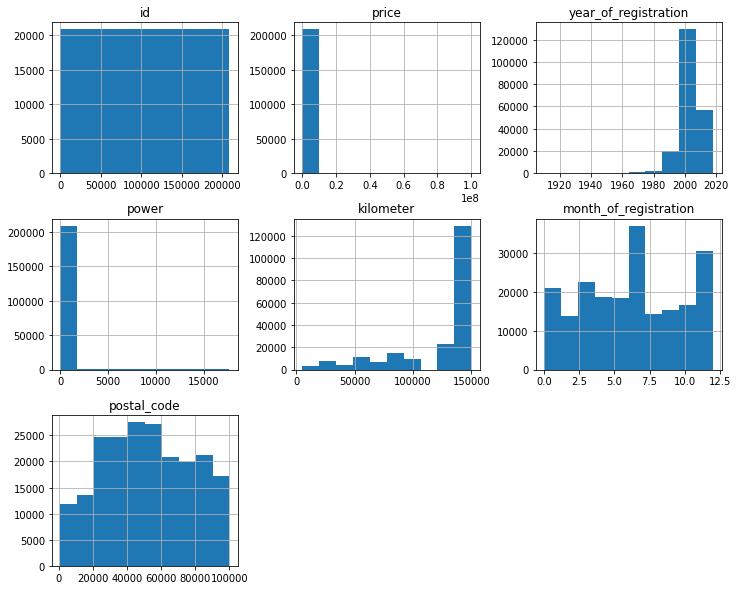

In [5]:
import matplotlib.pyplot as plt
train.hist(figsize = (12, 10))
plt.show

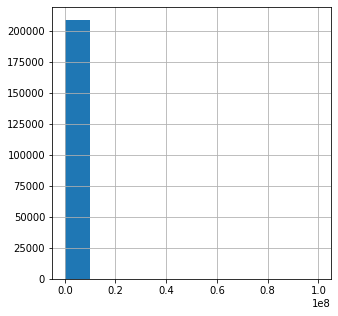

In [6]:
train['price'].hist(figsize = (5,5))
plt.show()

In [7]:
#separating the label from predictor variables
trainy = train['price']
trainx = train.drop(labels = ['price'],axis = 1)
print('We have around {} training examples with {} predictor variables'.format(trainx.shape[0], trainx.shape[1]))
trainx.head()

We have around 208764 training examples with 15 predictor variables


,id,seller,offer_type,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,control,bus,2007,automatik,136,b_klasse,125000,1,benzin,mercedes_benz,nein,55232
1,1,privat,Angebot,test,suv,2011,automatik,400,cayenne,80000,6,benzin,porsche,nein,89155
2,2,privat,Angebot,control,limousine,2005,manuell,0,a6,150000,11,diesel,audi,nein,26125
3,3,privat,Angebot,control,limousine,1997,manuell,170,3er,150000,5,benzin,bmw,nein,37671
4,4,privat,Angebot,test,kombi,1998,automatik,170,e_klasse,150000,8,benzin,mercedes_benz,ja,45141


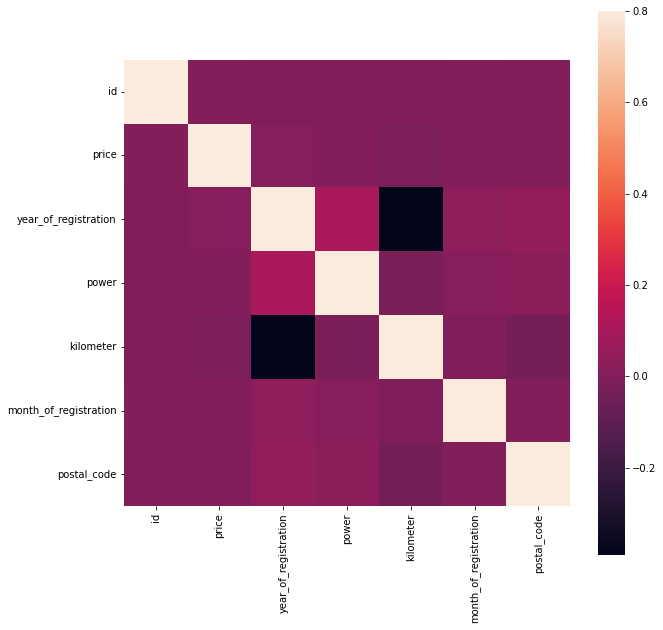

In [8]:
import seaborn as sb
c_mat = train.corr()
fig = plt.figure(figsize = (10,10))
sb.heatmap(c_mat, vmax = 0.8, square = True)
plt.show()

No linear relation (correlation) b/w price and other numerical features in the given dataset

In [9]:
#preprocessing continous variables
from sklearn.preprocessing import MinMaxScaler

def preprocess(df):
    df.dropna(inplace = True)
    df.reset_index(drop = True, inplace = True)
    df['age'] = 2022 - df['year_of_registration']
    df.drop(labels = ['year_of_registration', 'month_of_registration', 'postal_code'],axis = 1, inplace = True)
    
    scaler = MinMaxScaler()
    scaler.fit(df[['power', 'kilometer', 'age']])
    scaled = scaler.fit_transform(df[['power', 'kilometer','age']])

    scaled_df = pd.DataFrame(scaled, columns = ['power', 'kilometer', 'age'])
    df.drop(columns = ['power', 'kilometer', 'age'], axis = 1, inplace = True)
    df = pd.concat([df, scaled_df], axis = 1)
    df = pd.get_dummies(df, columns = ['seller', 'offer_type', 'abtest', 'vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired_damage'])
    return df

In [10]:
def preprocess_target(df):
    scaler = MinMaxScaler()
    df_transform = scaler.fit_transform(df)
    df_inverse = scaler.inverse_transform(df_transform)
    
    

In [11]:
# setting up the train and test data for preprocessing
trainx_num = len(trainx)
df = pd.concat(objs = [trainx, test], axis = 0)
df = df.reset_index()
df = preprocess(df)
trainx_processed = df[:trainx_num]
test_processed = df[trainx_num:]

In [12]:
len(trainx_processed.columns) == len(test_processed.columns)
print(len(trainx_processed.columns) )

319


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
NN_model = Sequential()
# Input layer
NN_model.add(Dense(128, kernel_initializer = 'normal', input_dim = trainx_processed.shape[1], activation = 'relu'))
# hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# output layers
NN_model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
# compiling the model
NN_model.compile(loss = 'MeanSquaredError', optimizer = 'adam', metrics = ['accuracy'])
NN_model.summary()

2022-07-22 06:41:17.494102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 06:41:17.637328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 06:41:17.638100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 06:41:17.640054: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               40960     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 205,825
Trainable params: 205,825
Non-trainable params: 0
_________________________________________________________________


node zero
2022-07-22 06:41:20.032938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 06:41:20.034107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 06:41:20.034969: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 06:41:20.035866: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15403 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [14]:
#checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [15]:
scaler = MinMaxScaler()
trainy_trans = scaler.fit_transform(trainy.to_numpy().reshape(-1,1))

In [16]:
#training
NN_model.fit(trainx_processed, trainy_trans, epochs=4, batch_size=32, validation_split = 0.1, callbacks=callbacks_list)

2022-07-22 06:41:21.878318: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
5872/5872 [==============================] - 17s 3ms/step - loss: 463.5718 - accuracy: 0.0119 - val_loss: 5.7013e-05 - val_accuracy: 0.0134

Epoch 00001: val_loss improved from inf to 0.00006, saving model to Weights-001--0.00006.hdf5
Epoch 2/4
5872/5872 [==============================] - 16s 3ms/step - loss: 49.3988 - accuracy: 0.0127 - val_loss: 2.4294e-05 - val_accuracy: 0.0134

Epoch 00002: val_loss improved from 0.00006 to 0.00002, saving model to Weights-002--0.00002.hdf5
Epoch 3/4
5872/5872 [==============================] - 15s 2ms/step - loss: 0.0472 - accuracy: 0.0129 - val_loss: 5.9578e-08 - val_accuracy: 0.0134

Epoch 00003: val_loss improved from 0.00002 to 0.00000, saving model to Weights-003--0.00000.hdf5
Epoch 4/4
5872/5872 [==============================] - 15s 3ms/step - loss: 0.1668 - accuracy: 0.0130 - val_loss: 1.0886e-07 - val_accuracy: 0.0134

Epoch 00004: val_loss did not improve from 0.00000


In [17]:
price = NN_model.predict(test_processed)
price = scaler.inverse_transform(price)

In [18]:
price

array([[-179532.38  ],
       [ -17760.88  ],
       [ -36857.324 ],
       ...,
       [  -1858.035 ],
       [   2157.828 ],
       [  -3968.0396]], dtype=float32)

In [19]:
#creating submission file
def submission(id, price):
    submit = pd.DataFrame()
    submit['id'] = id
    submit['price'] = price
    submit.to_csv('submission.csv', index = False)

In [20]:
submission(test['id'], price)